# Principal Component Analysis and t-Sine

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data.

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
2. Feature analysis
    - understand all features involeved.
    - list out features that needs to be considered in the model.
3. Standardize/Normalize the data
    - Use necessary scaler and standardize/normalize the data.
4. Perfom PCA
    - K-Means PCA
        - Make new dataset after PCA
    - Heirarchial Agglo PCA
        - Make new dataset after PCA
5. K-Means Clustering - PCA
    - Determine the hyperparameter via elbow graph.
    - build K-means algorithm.
    - get cluster.labels_
    - Model Evaluation and t-Sine Visualization
6. K-Means Clustering - Original Dataset
    - Determine the hyperparameter via elbow graph.
    - build K-means algorithm.
    - get cluster.labels_
    - Model Evaluation and PCA Reduced Visualization
7. Heirarchial Agglomerative Clustering -PCA
    - identify the hyperparementer (number of clusters).
    - make dentogram of model and specify the linkage.
    - perform agglomerative clustering.
    - get cluster.labels_
    - Model Evaluation and t-Sine Visualization
8. Heirarchial Agglomerative Clustering -Original Dataset
    - identify the hyperparementer (number of clusters).
    - make dentogram of model and specify the linkage.
    - perform agglomerative clustering.
    - get cluster.labels_
    - Model Evaluation and PCA Reduced Visualization
9. Conclusion

## Import New Dataset

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("C:/Users/Admin/Documents/Assignments/8_PCA/wine.csv")
raw_data.head() 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
raw_data.info()
#There are no null values & All are numercial values 
#There are total 12 features we need to consider other than type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
raw_data.describe() #We do not need type since we are doing clustering. 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
raw_data.Type.value_counts() #We

2    71
1    59
3    48
Name: Type, dtype: int64

In [6]:
#EDA_report= pp.ProfileReport(raw_data)
#EDA_report.to_file(output_file='wine.html') 

<AxesSubplot:>

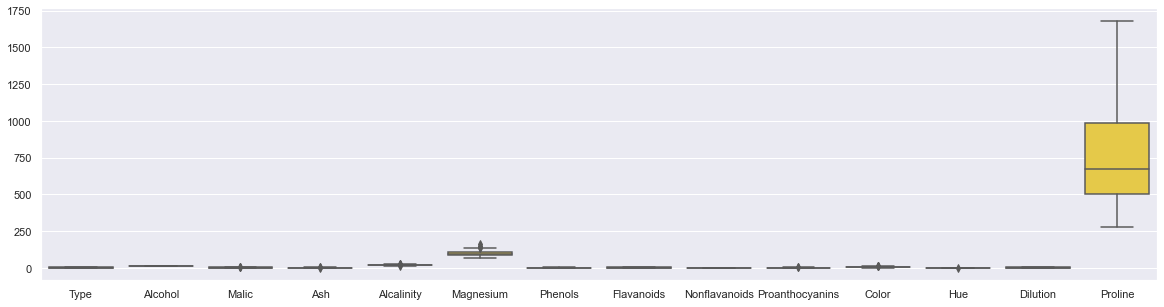

In [7]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=raw_data, orient="v", palette="Set2") 
#There are no major outliers in the distribution.

## Feature Analysis

All features in the dataset can be used in model building. All values are numerical and no additional dummy variable creation is required. Principal component Analysis will be perfomed after standardizing the data. Type feature is not required.

## Standardizing & Normalize the Data

In [8]:
from sklearn.preprocessing import StandardScaler
#For K-Means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data.iloc[:,1:]) 
#first column is type which is already categorised and not useful for unsupervised clustering
scaled_data[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [9]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

#For Heirarchial Agglo

array = raw_data.iloc[:,1:]  #first column is type which is already categorised and not useful for unsupervised clustering

norm_scaler = MinMaxScaler(feature_range=(0,1))
normscaled = norm_scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(normscaled[:5])


[[0.84 0.19 0.57 0.26 0.62 0.63 0.57 0.28 0.59 0.37 0.46 0.97 0.56]
 [0.57 0.21 0.42 0.03 0.33 0.58 0.51 0.25 0.27 0.26 0.46 0.78 0.55]
 [0.56 0.32 0.7  0.41 0.34 0.63 0.61 0.32 0.76 0.38 0.45 0.7  0.65]
 [0.88 0.24 0.61 0.32 0.47 0.99 0.66 0.21 0.56 0.56 0.31 0.8  0.86]
 [0.58 0.37 0.81 0.54 0.52 0.63 0.5  0.49 0.44 0.26 0.46 0.61 0.33]]


## Principal Component Analysis

### For K-Means

In [10]:
# We need top 3 PCA values
# Standardized values will be used for K-Means and Normalised will be used for Agglo Clustering
pca_arr = PCA(n_components = 3)
pca_std_arr = pca_arr.fit_transform(scaled_data)
pca_std_arr[:5] #These are arrays

array([[ 3.32, -1.44, -0.17],
       [ 2.21,  0.33, -2.03],
       [ 2.52, -1.03,  0.98],
       [ 3.76, -2.76, -0.18],
       [ 1.01, -0.87,  2.03]])

In [11]:
var1 =pca_arr.explained_variance_ratio_
var1 #The first 3 PCA scores roughly explain only 69% of the data

array([0.36, 0.19, 0.11])

In [12]:
var2 = np.cumsum(np.round(var1,decimals = 4)*100)
var2

array([36.2 , 55.41, 66.53])

#### Making data set for Kmeans - PCA clustering

In [13]:
pca_std_df = pd.DataFrame(pca_std_arr)
pca_std_df.head() #We have made a seperate dataset for PCA KMeans Clustering

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


### For Agglomerative

In [14]:
pca_norm_arr = pca_arr.fit_transform(normscaled)
pca_norm_arr[:5]

array([[-0.71, -0.25,  0.02],
       [-0.48, -0.01, -0.28],
       [-0.52, -0.19,  0.2 ],
       [-0.82, -0.58,  0.08],
       [-0.2 , -0.06,  0.3 ]])

In [15]:
var1 =pca_arr.explained_variance_ratio_
var1

array([0.41, 0.19, 0.09])

In [16]:
var2 = np.cumsum(np.round(var1,decimals = 4)*100)
var2

array([40.75, 59.72, 68.28])

#### Making data set for Agglomerative - PCA clustering

In [17]:
pca_norm_df = pd.DataFrame(pca_norm_arr)
pca_norm_df.head() #We have made a seperate dataset for PCA KMeans Clustering

,0,1,2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


## K-Means Clustering - PCA

#### Finding optimum number of clusters for PCA dataset

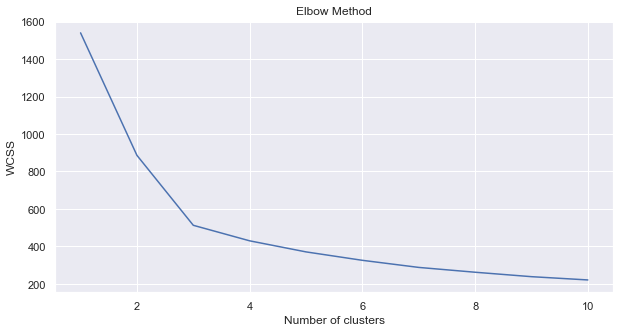

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_std_df)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Number of clusters(optimum) = 3

#### Building Clustering Algorithm

In [19]:
clusters_kmeans_pca = KMeans(3, random_state=50)
clusters_kmeans_pca.fit(pca_std_df)

KMeans(n_clusters=3, random_state=50)

#### Get Clusters.labels_

In [20]:
clusters_kmeans_pca.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [21]:
#Assigning clusters to the datset
#Assign clusters to the data set
data_kmeans_pca = pca_std_df.copy()
data_kmeans_pca['clusters_kmeans'] = clusters_kmeans_pca.labels_

In [22]:
#cluster_centers values. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
clusters_kmeans_pca.cluster_centers_

array([[-2.72e+00, -1.13e+00, -2.39e-01],
       [ 2.28e+00, -8.95e-01, -2.15e-03],
       [-7.27e-02,  1.78e+00,  1.93e-01]])

#### Model Evaluation & t-Sine Visualisation

In [23]:
data_kmeans_pca.groupby('clusters_kmeans').agg(['mean'])

,0,1,2
,mean,mean,mean
clusters_kmeans,,,
0,-2.720036,-1.125651,-0.239093
1,2.275808,-0.894518,-0.002150
2,-0.072720,1.777544,0.192644


In [24]:
data_kmeans_pca['clusters_kmeans'].value_counts()

2    64
1    63
0    51
Name: clusters_kmeans, dtype: int64

In [25]:
data_kmeans_pca.head()

,0,1,2,clusters_kmeans
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


Text(0.5, 1.0, 'T-Sine Visualization of K-Means PCA clustering')

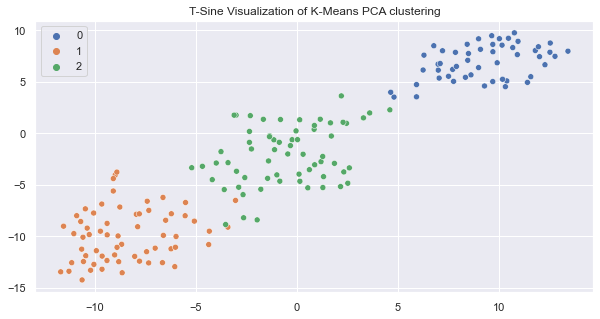

In [26]:
#Visualising the data via dimensionality reduction t-Sine Technique
from sklearn.manifold import TSNE

data_tsne_pca_kmeans = TSNE(n_components=2).fit_transform(data_kmeans_pca.iloc[:,:-1])
sns.scatterplot(data_tsne_pca_kmeans[:,0],data_tsne_pca_kmeans[:,1],hue=clusters_kmeans_pca.labels_, palette="deep").set_title('T-Sine Visualization of K-Means PCA clustering')

## K-Means Clustering - Original Dataset

#### Findfing optimal number of Clusters

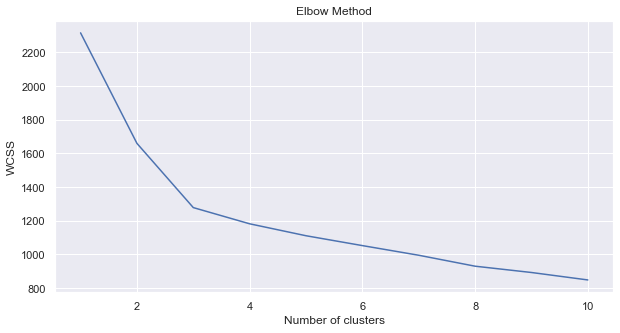

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Optimal number of Clusters is 3 in this case too

#### Building Clustering Algorithm

In [28]:
clusters_kmeans = KMeans(3, random_state=50)
clusters_kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=50)

In [29]:
clusters_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [30]:
#Assigning clusters to the datset
#Assign clusters to the data set
data_kmeans = raw_data.iloc[:,1:].copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [31]:
#cluster_centers values. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
clusters_kmeans.cluster_centers_


array([[ 0.84, -0.3 ,  0.36, -0.61,  0.58,  0.89,  0.98, -0.56,  0.58,
         0.17,  0.47,  0.78,  1.13],
       [ 0.16,  0.87,  0.19,  0.52, -0.08, -0.98, -1.22,  0.73, -0.78,
         0.94, -1.16, -1.29, -0.41],
       [-0.93, -0.39, -0.49,  0.17, -0.49, -0.08,  0.02, -0.03,  0.06,
        -0.9 ,  0.46,  0.27, -0.75]])

#### Model Evaluation & PCA Reduction Visualisation

In [32]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_kmeans,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [33]:
data_kmeans['clusters_kmeans'].value_counts()

2    65
0    62
1    51
Name: clusters_kmeans, dtype: int64

In [34]:
data_kmeans.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [35]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

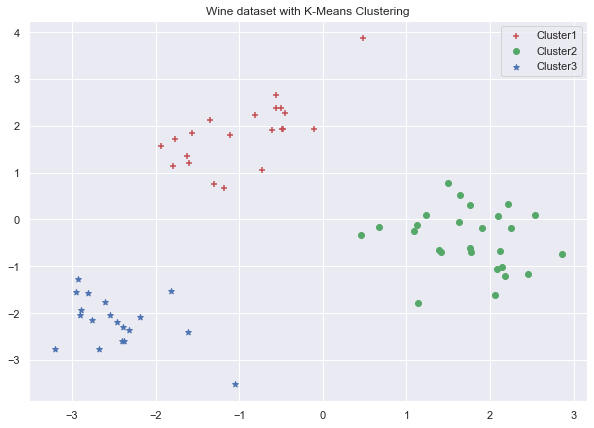

In [36]:
import pylab as pl

sns.set(rc={'figure.figsize':(10,7)})

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2','Cluster3'])
pl.title('Wine dataset with K-Means Clustering')
pl.show() #Not good visualisation as compared to t-Sine visualisation

## Heirarchial Agglomerative Clustering - PCA

#### Identifying the hyperparameters
- No of clusters = 3

#### Making a dentogram

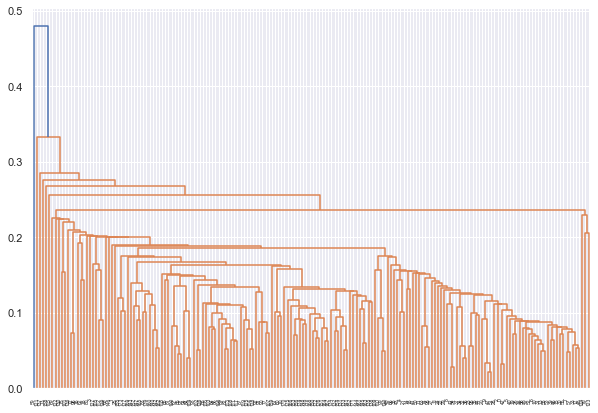

In [37]:
import scipy.cluster.hierarchy as sch
#dentogram linkage takes too much time to process. Not adivasable
dendrogram = sch.dendrogram(sch.linkage(pca_norm_df, method='single'))

#### Building Agglomerative clustering model

In [38]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
agglo_pca = hc.fit_predict(pca_norm_df)

#### Get Clusters.labels_

In [39]:
agglo_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [41]:
data_agglo_pca = pca_norm_df.copy()
data_agglo_pca['clusters_agglo'] = agglo_pca
data_agglo_pca.head()

,0,1,2,clusters_agglo
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1


In [42]:
data_agglo_pca.clusters_agglo.value_counts()

0    107
1     62
2      9
Name: clusters_agglo, dtype: int64

#### Model Evaluation & Visualisation

In [43]:
data_agglo_pca.groupby('clusters_agglo').agg(['mean'])

,0,1,2
,mean,mean,mean
clusters_agglo,,,
0,0.273576,0.091682,-0.039456
1,-0.485404,-0.198350,-0.000034
2,0.091377,0.276421,0.469319


Text(0.5, 1.0, 'T-Sine Visualisation of Agglo PCA clustering')

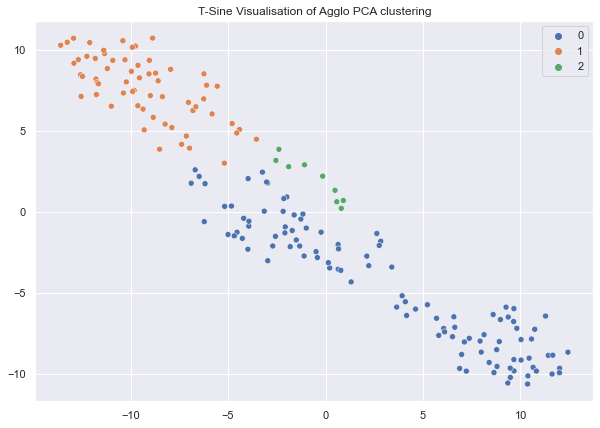

In [44]:
#Visualising the data via dimensionality reduction t-Sine Technique
from sklearn.manifold import TSNE

data_tsne_pca_agglo = TSNE(n_components=2).fit_transform(data_agglo_pca.iloc[:,:-1])
sns.scatterplot(data_tsne_pca_agglo[:,0],data_tsne_pca_agglo[:,1],
                hue=agglo_pca, palette="deep").set_title('T-Sine Visualisation of Agglo PCA clustering')
#Good Visualisation

## Heirarchial Agglomerative Clustering - Original Dataset

#### Identifying the hyperparameters

- Number of Clusters = 3

#### Making a dentogram

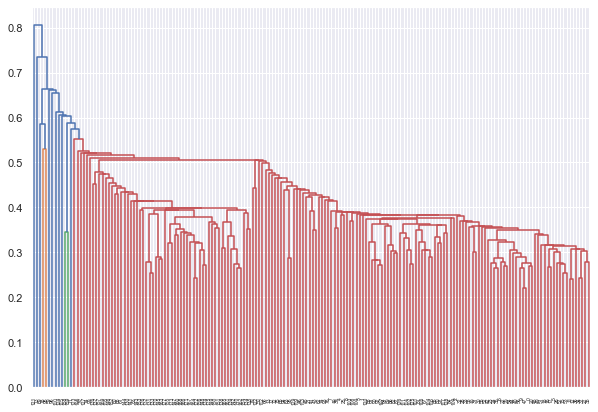

In [45]:
#dentogram linkage takes too much time to process. Not adivasable
dendrogram = sch.dendrogram(sch.linkage(normscaled, method='single'))

#### Building Agglomerative clustering model

In [46]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(normscaled)

#### Get Clusters.labels_

In [47]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [48]:
data_agglo = raw_data.iloc[:,1:].copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

0    73
1    62
2    43
Name: clusters_agglo, dtype: int64

#### Model Evaluation & Visualisation

In [49]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_agglo,,,,,,,,,,,,,
0,12.280822,1.916301,2.227534,19.923288,94.739726,2.170274,1.926712,0.363562,1.570274,3.268082,1.025425,2.647671,526.616438
1,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806
2,13.215349,3.537674,2.447674,21.558140,98.139535,1.700000,0.785349,0.462093,1.181163,7.508605,0.681628,1.742791,623.651163


In [50]:
#Visualising the data via dimensionality reduction

pca_agg = PCA(n_components=2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

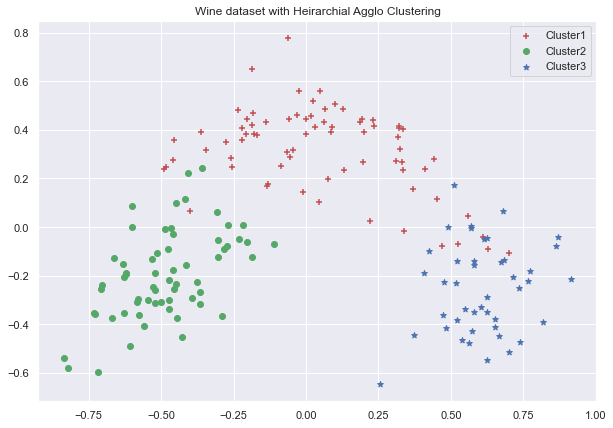

In [51]:
sns.set(rc={'figure.figsize':(10,7)})

for i in range(0, pca_2d_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')  
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2', 'Cluster3'])
pl.title('Wine dataset with Heirarchial Agglo Clustering')
pl.show() #Not good visualisation as compared to T-sine plot

## Conclusion
- As per the task, Principal Component analysis was performed before clustering in K-means and Heirarchial Agglomerative Clustering.
- In case of PCA applied data sets with 3 clusters, we recieved good visualisations after t-Sine Calculation.
- For regular clustering, PCA reduction was done in the final stage for plotting which was not good visualisation.
- I would like to draw the conclusion that to plot high dimensional data, we should first reduce it via PCA reduction and further reduce it by t-Sine transformation before plotting